In [76]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
!pip install tweepy==4.9.0
import tweepy
import pandas as pd
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [78]:
#Twitter Creds:
consumerKey = 'IX97vAG7cHHoU94gde2YLzpqv'
consumerKeySecret = 'VWEqTkG96FYfpx4wpziDyroh6mCaRiaPhx67DEdnMwBEgsjof9'
accessToken = '70369388-EjkcIIyLwm4tZzGtww8UoyQstOuhN4cQ3foeOkP9S'
accessTokenSecret = 'O6tkQPZABSVPZFJpThybWsCCeeiGZ6TjpWfSHdvznJ6WO'

In [79]:
#Authentication
from tweepy.auth import OAuthHandler
auth = OAuthHandler("0y7HDWlm68WDozpu3H2N7DeSB", "GcgeB6fd6ZODXLCFD1VxtCc5z0l8jZm94V9j8GvlWerrXtuGqy")
auth.set_access_token("70369388-us37ps2KRFrV7VOG4AUbTGQowhlkW2q1JhLupRJXD", "bKqS0jvgDITlSJm0GCf0gCaVB4rSYCcR2s6HAui3UIiu4")
api = tweepy.API(auth)

In [80]:
client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAA8KjAEAAAAA7XVehHSIllIQJleQJ6kPdW1NCBk%3D0u58oYAxyvNEQ3EvQmAcwP5jJLzJkwvH5rtXDKcKtanu9BzSqf')
query = '#Argentina -is:retweet lang:en'
paginator = tweepy.Paginator(
    client.search_recent_tweets,           # The method you want to use
    query=query,                           # Some argument for this method
    max_results=100,                       # How many tweets per page
    limit=10                               # How many pages to retrieve
)
# Get tweets that contain the hashtag #TypeKeywordHere
# -is:retweet means I don't want retweets
# lang:en is asking for the tweets to be in english

tweet_list = []

for tweet in paginator.flatten(): # Total number of tweets to retrieve
    tweet_list.append(tweet)
    print(tweet)

@jaja91494470 @Tesla @Twitter Nov 24 EWE:  Argentina — Another brutal heat wave in #Argentina in this extremely hot November.  https://t.co/PUkhQF5iI5
Divided by borders united by friendship.
#FIFAWorldCupQatar2022 
#Argentina #Messi
#Brazil #Neymar https://t.co/bhz9evHX4G
Winning of Brazil vs Switzerland #shorts #brazil #argentina #switzerland... https://t.co/sp7rgSmMAF via @YouTube
Worl Cup 2022
Group C
😄
#WorldCup2022 
#Argentina 
#SaudiArabia 
#Poland 
#Mexico https://t.co/zNUnpLHmXy
Super crazy 💥💥 #LeoMessi #Argentina https://t.co/TmpiTqb0Cs
Believe it or not #Germany and #Argentina can still get eliminated in next game if they lost! 👈🤗🏆🧢
"Progressive governments" never learn. They act together usually making the same mistakes. In this case, #Argentina follows #Bolivia's wrong path to pseudo-#lithium industrialization. Many questions are pending in the air. 
1. Where will the required minerals come from?
1/2 https://t.co/AnnF9oMqMQ
The Futuristic Robo Dog 🔥:  https://t.co/gPI33sYU

In [81]:
def preprocess_tweet(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''
    
    sentence = sen.lower()

    # Remove RT
    sentence = re.sub('RT @\w+: '," ", sentence)

    # Remove special characters
    sentence = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.

    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.

    return sentence

In [82]:
#Creating new dataframe and new features
tweet_list_df = pd.DataFrame(tweet_list)
tweet_list_df = pd.DataFrame(tweet_list_df['text'])
tweet_list_df.head(5)

,text
0,@jaja91494470 @Tesla @Twitter Nov 24 EWE: Arg...
1,Divided by borders united by friendship.\n#FIF...
2,Winning of Brazil vs Switzerland #shorts #braz...
3,Worl Cup 2022\nGroup C\n😄\n#WorldCup2022 \n#Ar...
4,Super crazy 💥💥 #LeoMessi #Argentina https://t....


In [83]:
cleaned_tweets = []

for tweet in tweet_list_df['text']:
  cleaned_tweet = preprocess_tweet(tweet)
  cleaned_tweets.append(cleaned_tweet)

In [84]:
tweet_list_df['cleaned'] = pd.DataFrame(cleaned_tweets)
tweet_list_df.head(5)

,text,cleaned
0,@jaja91494470 @Tesla @Twitter Nov 24 EWE: Arg...,nov 24 ewe argentina another brutal heat wave...
1,Divided by borders united by friendship.\n#FIF...,divided by borders united by friendship fifawo...
2,Winning of Brazil vs Switzerland #shorts #braz...,winning of brazil vs switzerland shorts brazil...
3,Worl Cup 2022\nGroup C\n😄\n#WorldCup2022 \n#Ar...,worl cup 2022 group worldcup2022 argentina sau...
4,Super crazy 💥💥 #LeoMessi #Argentina https://t....,super crazy leomessi argentina


In [85]:
tweet_list_df[['polarity', 'subjectivity']] = tweet_list_df['cleaned'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tweet_list_df['cleaned'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if comp <= -0.05:
        tweet_list_df.loc[index, 'sentiment'] = "negative"
    elif comp >= 0.05:
        tweet_list_df.loc[index, 'sentiment'] = "positive"
    else:
        tweet_list_df.loc[index, 'sentiment'] = "neutral"
    tweet_list_df.loc[index, 'neg'] = neg
    tweet_list_df.loc[index, 'neu'] = neu
    tweet_list_df.loc[index, 'pos'] = pos
    tweet_list_df.loc[index, 'compound'] = comp

tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@jaja91494470 @Tesla @Twitter Nov 24 EWE: Arg...,nov 24 ewe argentina another brutal heat wave...,-0.312500,0.925000,negative,0.227,0.773,0.000,-0.6249
1,Divided by borders united by friendship.\n#FIF...,divided by borders united by friendship fifawo...,0.000000,0.000000,positive,0.000,0.612,0.388,0.6908
2,Winning of Brazil vs Switzerland #shorts #braz...,winning of brazil vs switzerland shorts brazil...,0.500000,0.750000,positive,0.000,0.726,0.274,0.5267
3,Worl Cup 2022\nGroup C\n😄\n#WorldCup2022 \n#Ar...,worl cup 2022 group worldcup2022 argentina sau...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,Super crazy 💥💥 #LeoMessi #Argentina https://t....,super crazy leomessi argentina,-0.133333,0.783333,positive,0.289,0.241,0.470,0.3612


In [86]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tweet_list_df_negative = tweet_list_df[tweet_list_df["sentiment"]=="negative"]
tweet_list_df_positive = tweet_list_df[tweet_list_df["sentiment"]=="positive"]
tweet_list_df_neutral = tweet_list_df[tweet_list_df["sentiment"]=="neutral"]

Donut Charts


In [87]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [88]:
#Count_values for sentiment
count_values_in_column(tweet_list_df,"sentiment")

,Total,Percentage
positive,535,54.10
neutral,344,34.78
negative,110,11.12


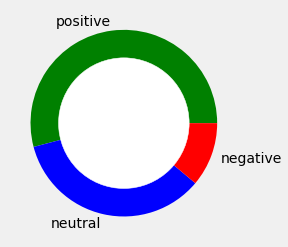

In [89]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_list_df,"sentiment")
# names= pc.index
# size=pc["Percentage"]

names= pichart.index
size=pichart["Percentage"]

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [90]:
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  max_words=100,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("c1_wordcloud.png")
    print("Word Cloud Saved Successfully")
    path="c1_wordcloud.png"
    display(Image.open(path))

Word Cloud Saved Successfully


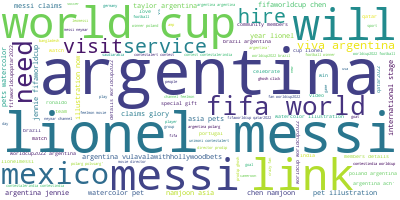

In [91]:
# Creating wordcloud for all tweets

create_wordcloud(tweet_list_df["cleaned"].values)
# create_wordcloud(tweet_list_df_positive["text"].values)
# create_wordcloud(tweet_list_df_negative["cleaned"].values)
# create_wordcloud(tweet_list_df_neutral["text"].values)

In [92]:
tweet_list_df['text_len'] = tweet_list_df['cleaned'].astype(str).apply(len)
tweet_list_df['text_word_count'] = tweet_list_df['cleaned'].apply(lambda x: len(str(x).split()))

In [93]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,155.01
neutral,145.11
positive,151.53


In [94]:
round(pd.DataFrame(tweet_list_df.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,23.55
neutral,21.11
positive,22.01


In [95]:
tweet_list_df.to_csv("./c2_sentimentanalysis_output.csv", sep=',', encoding='UTF-8')
tweet_list_df.head(5)

,text,cleaned,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count
0,@jaja91494470 @Tesla @Twitter Nov 24 EWE: Arg...,nov 24 ewe argentina another brutal heat wave...,-0.312500,0.925000,negative,0.227,0.773,0.000,-0.6249,91,15
1,Divided by borders united by friendship.\n#FIF...,divided by borders united by friendship fifawo...,0.000000,0.000000,positive,0.000,0.612,0.388,0.6908,92,11
2,Winning of Brazil vs Switzerland #shorts #braz...,winning of brazil vs switzerland shorts brazil...,0.500000,0.750000,positive,0.000,0.726,0.274,0.5267,73,10
3,Worl Cup 2022\nGroup C\n😄\n#WorldCup2022 \n#Ar...,worl cup 2022 group worldcup2022 argentina sau...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000,69,9
4,Super crazy 💥💥 #LeoMessi #Argentina https://t....,super crazy leomessi argentina,-0.133333,0.783333,positive,0.289,0.241,0.470,0.3612,31,4
